In [1]:
import pandas as pd
import numpy as np
from IPython import display

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    gym = pd.read_csv('/datasets/gym_churn_us.csv')
    
except:
    gym = pd.read_csv('C:/Users/Admin/Desktop/practicum/modul_3/forescast/gym_churn_us.csv')
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
gym.columns=gym.columns.str.lower()
gym = gym.rename(columns = {'avg_additional_charges_total' : 'charges', 'avg_class_frequency_total' : 'frequency_total', 'avg_class_frequency_current_month' : 'frequency_month', 'month_to_end_contract' : 'end_contract'})

In [4]:
gym.tail()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,charges,end_contract,lifetime,frequency_total,frequency_month,churn
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12.0,1,1.101832,1.035270,0


In [5]:
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,charges,end_contract,lifetime,frequency_total,frequency_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [6]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4000 non-null   int64  
 1   near_location    4000 non-null   int64  
 2   partner          4000 non-null   int64  
 3   promo_friends    4000 non-null   int64  
 4   phone            4000 non-null   int64  
 5   contract_period  4000 non-null   int64  
 6   group_visits     4000 non-null   int64  
 7   age              4000 non-null   int64  
 8   charges          4000 non-null   float64
 9   end_contract     4000 non-null   float64
 10  lifetime         4000 non-null   int64  
 11  frequency_total  4000 non-null   float64
 12  frequency_month  4000 non-null   float64
 13  churn            4000 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


The data is presented as a table of 4,000 rows and 14 columns, ten columns are of integer type (< int >), the other four are < float >. Let's look at what columns are in the table, and what information they contain. The data can be divided into categories:
# The user's data for the previous month before the churn check:
* gender - gender;
* near_location     - residence or work in the area where the fitness center is located;
* partner           - an employee of the club's partner company (such employees can get discounts on a membership);
* promo_friends     - the fact of initial registration in the "bring a friend" action (used a promo-code from an acquaintance when paying for the first subscription);
* phone             - availability of the contact phone number;
* age               - age;
* lifetime          - time since first contact with the fitness center (in months).
# Information based on the log of visits, purchases and information about the current status of the client's subscription:
* contract_period   - duration of the current active subscription (month, 6 months, year);
* end_contract      - term till the end of the current active subscription (in months);
* group_visits      - the fact of attending group classes;
* frequency_total   - average frequency of attendance per week for the whole time since the beginning of the subscription;
* frequency_month   - average frequency of attendance per week for the month;
* charges           - total revenue from other services of the fitness center: café, sports goods, beauty and massage salon;
# Key field:
* churn - the fact of churn in the current month.

Note that the number of rows in each column is the same, which tells us that there is most likely no missing data in the table. Almost all of the columns have a data type corresponding to their value. However, the end_contract column is a column with information about the number of months that takes integer values, so it needs to be converted. We will not round the floating-point data, because it may be important in the analysis to distinguish between individual users in terms of indicators, and with rounding we may lose that. Most columns are binary: take values 0 or 1. Also, for ease of analysis, we should bring the names of columns to lower case, which we did

In [7]:
gym['end_contract'] = gym['end_contract'].astype('int')

In [8]:
gym.isna().sum()

gender             0
near_location      0
partner            0
promo_friends      0
phone              0
contract_period    0
group_visits       0
age                0
charges            0
end_contract       0
lifetime           0
frequency_total    0
frequency_month    0
churn              0
dtype: int64

In [9]:
gym.duplicated().sum()

0

# Conclusion
We have initial information about the user's data for the previous month before checking the fact of churn, information based on the log of visits, purchases, as well as information about the current status of the client's subscription.

The data is presented as a table with 4 000 rows and 14 columns with the gender, the fact of living or working in the area of the fitness center, the allocation of the employees of the company-partner of the club, the fact of the initial registration in the "bring a friend" action, the designation of the contact phone number, age, time since the first contact with the fitness center, duration of the current active season ticket, the period until the end of the current active season ticket, the fact of visiting group classes, the average frequency of visits per week for all time since the beginning of active

At the stage of data preparation the column names in the table were converted to lower case, the data type of the column with the information about the term to the end of the current active subscription was changed. No omissions or duplicates were found in the data.

## STEP 2. EDA

In [10]:
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,charges,end_contract,lifetime,frequency_total,frequency_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


## Let's examine the data for each column.

1. gender - We have data on men and women, which are labeled 0 and 1. In this case there is an equal number of them in the sample (since the sample has an even number of data, the average is close to 0.5, and the median value is 1).
2. near_location - We have data on people who live or work near or far from a fitness center. The categories are labeled 0 and 1. At the same time, there are more people in the sample who live or work nearby (because the average is close to 0.85 and the first quartile is 1).
3. partner - Data on people who are or are not employees of the partner company of the club are indicated by 0 and 1. At the same time in the sample both groups are represented in approximately equal proportion (the average is close to 0.5).
4. promo_friends - data on people who have or haven't bought their first season ticket under the "Bring a friend" promotion. The categories are labeled 0 and 1. There are more people in the sample who did not come for this promotion (because the mean is close to 0.3 and the median is 0).
5. phone - The available client data either has contact phone information (value 1) or does not (value 0). In this case, there are more of those in the sample for whom contact information is provided (because the average is close to 0.9, and the fourth quartile is 1).
6. age -  data on clients between the ages of 18 and 41. The average age is 29 years old. People of different ages are chosen fairly evenly (because the average is close to the median, and the standard deviation is very low).
7. lifetime - We have data on clients who contacted the fitness center for the first time from 0 to 31 months ago. The average time since the first contact is 3 months. At the same time there is a slight skew in the data, as the average value is closer to 4 months.
8. contract_period - The current subscription for the clients in question has a term of 1, 6 and 12 months. The average duration of an active subscription is 4-5 months. At the same time there is a skew in the data: for most of the active subscription period is 1 month.
9. end_contract - We have data on clients who have 1 to 12 months left on their season tickets. On average this value is about 4 months. More than half of the sample are people who have 1 month left on their season tickets.
10. group_visits - We have data on clients who attend group classes (value 1) or do not attend (value 0). At the same time, there are slightly more clients in the sample who do not attend such classes (the average is close to 0.4, and the median is 0).
11. frequency_total - data on clients with an average frequency of visits for the whole time since the beginning of the subscription from 0 to 6 times a week. On average, this value is about 2 times per week. The sample is even, because the mean is almost equal to the median and the standard deviation is low.
12. frequency_month - data on clients with an average monthly frequency of visits from 0 to 6 times a week. On average, this value is about 2 times per week. The sample is even, because the mean is almost equal to the median and the standard deviation is low.
13. charges - Revenues from other fitness center services ranged from 0.15 to 552.6 conventional money. The average value is about 147 conventional money, the median is 136 conventional money. The scatter of the data is very large (we do not know for sure in what conventional money the data are measured).
14. churn - data on customers who continue to use the services of the fitness center (value 0) and those who "left" (value 1). At the same time in the sample there are more of those who continue to use the services (the average is close to 0.3, and the median is equal to 0).

In [11]:
gym_1 = gym.groupby('churn').mean()
gym_1

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,charges,end_contract,lifetime,frequency_total,frequency_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


If the average of the binary indicators (0 and 1) is closer to 1, then there are more people with the trait than without it; if less than 0.5, then there are fewer.

By gender, we have roughly equal numbers of people of different genders in the two groups.

By proximity to the fitness center, the group that is loyal to the fitness center has slightly more people who live or work nearby than those who are farther away.

There are differences in churn among those who are employees of the club's partner company. Among those who stayed, about half are both affiliated and unaffiliated, with a slight preponderance of the former. But of those who left, there are more customers who are not affiliated with an affiliate company.

In both groups, there are more people who purchased their first subscription through a "Bring a Friend" promotion. But among those who stayed, there are more who came through the promo.

There is no difference between the groups in the availability of the clients' contact phone number - almost all of them leave contacts for contact.

The duration of valid subscriptions for the remaining users on average about 5-6 months, and for those who left - 1-2 months. This suggests that those who bought a long-term subscription are more reluctant to leave than those with a short-term subscription.

Attendance of group classes by the allocated groups also differs: among the remaining clients the distribution of those who attend such classes and those who do not attend them is approximately equal (the latter are slightly more); but among those who left the group classes there are significantly more group class non-attendees than those who attend them.

In the group of people who are loyal to the fitness center, the average age is about 30 years old, and among those who leave, the average age is about 27 years old. That is, the second group is slightly younger.

The average revenue from other fitness center services between the groups differs by 43 denominations. (in the group of loyalists it is higher than in the group of quitters).

On average, the period until the end of the current subscription is about 1-2 months for the people who left, and about 5 months for the remaining customers. This again indicates that those who leave are more likely to have a short remaining subscription period.

The time since first contact for those who leave in the outflow is 1 month, and for those who stay, close to 5 months. Thus, the first months' loyal customers are not likely to go into attrition after a long period of using the services of the fitness center.

The average frequency of visits per week during the subscription period is not very different in the groups. Loyal customers on average visit the center 2 times a week, and those who leave - from 1 to 2.

The difference between the groups in the average frequency of visits per week for the month is also not very high: the non-loyal clients visited the fitness club 2 times a week on average, and those who left - once a week.

## Feature distribution analysis

In [12]:
#Let's divide the samples into clients who went into churn (churn_clients) and clients who stayed (loyal_clients)
churn_clients = gym.query('churn == 1')
loyal_clients = gym.query('churn == 0')

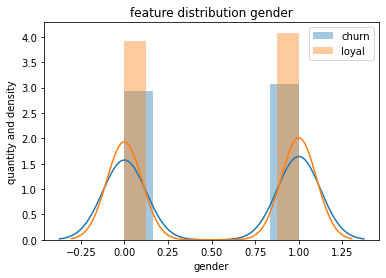

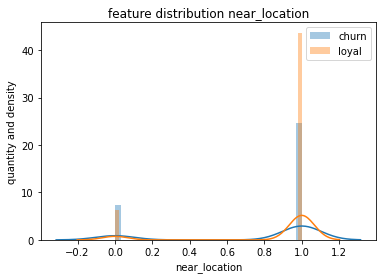

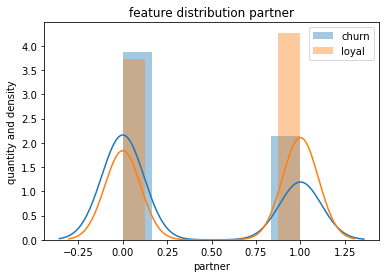

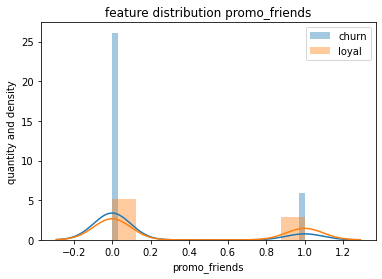

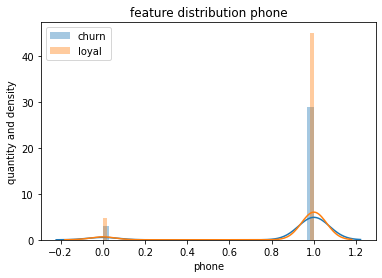

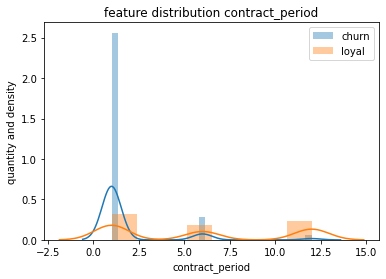

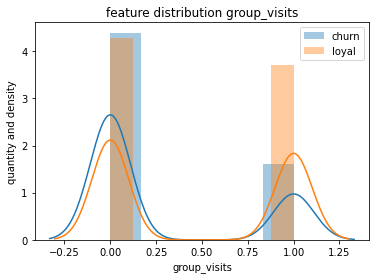

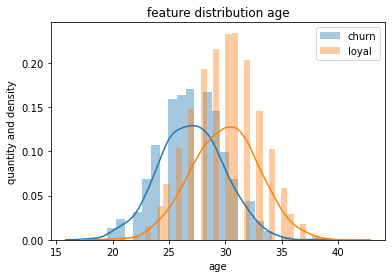

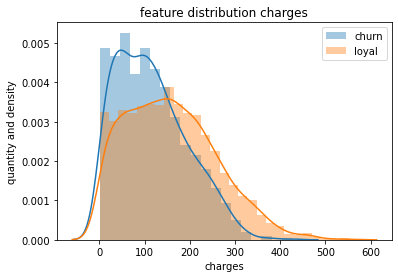

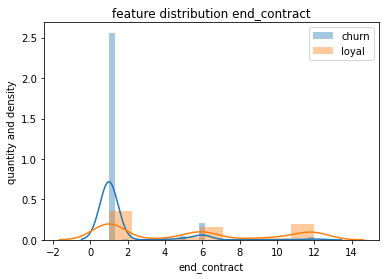

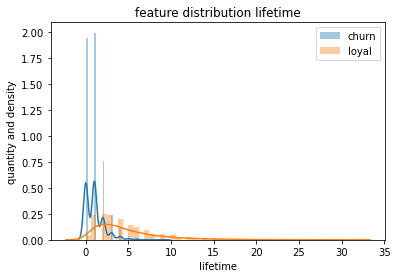

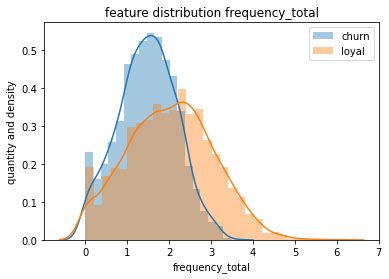

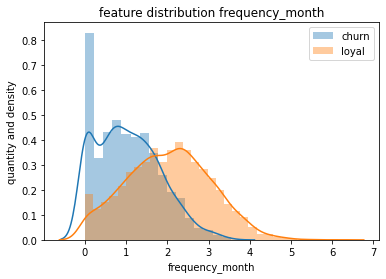

In [13]:
#Let's build bar graphs and feature distributions for both groups
fig, ax = plt.subplots()
for column in gym.drop('churn', axis = 1).columns:
    plt.title("feature distribution "+column)
    plt.xlabel(column)
    plt.ylabel("quantity and density")
    sns.distplot(churn_clients[column], label='churn')
    sns.distplot(loyal_clients[column], label='loyal')
    plt.legend()
    plt.show()

## conclusion of this part
Both groups have an even distribution when it comes to gender, proximity to the fitness center, and availability of a contact phone.

There are differences in the distribution of groups based on affiliation with a partner company. Loyal customers have a higher number of employees related to the partner company compared to those who leave. The same difference is observed in the distribution of groups by group attendance.

The "Bring a Friend" promotion is slightly more popular among those who stayed, but the distributions are similar.

There is a difference in the distribution of the duration of the current subscription between those who stayed and those who left. Loyal customers mostly buy a subscription for 1 month, followed by a year, and then 6 months. On the other hand, those who left mostly bought a subscription for 1 month, followed by 6 months (with very few subscriptions), and almost none for 12 months. The differences in the distribution of groups by the period until the end of the current season ticket are the same as in the distribution by the duration of the season ticket.

Both groups have a normal distribution in terms of average age, but loyal customers have a slightly higher average age compared to those who left.

The distribution of average revenue from other fitness center services is skewed to the left for both groups, but more so for those who left. In other words, those who left spend very little on additional services in the fitness center.

The distribution of time since first contact for both groups is similar to the Poisson distribution. However, it is heavily skewed to the left for those who left, with almost no higher values, while it takes on higher values for loyal customers.

The distribution for the average frequency of visits per week during the subscription period is normal for both groups. The loyal group has a slightly lower average frequency compared to those who left. Similar differences between the groups are observed in the distributions of the average frequency of visits per week per month.





## Correlation matrix

In [14]:
correlation = gym.corr()
correlation

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,charges,end_contract,lifetime,frequency_total,frequency_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
charges,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


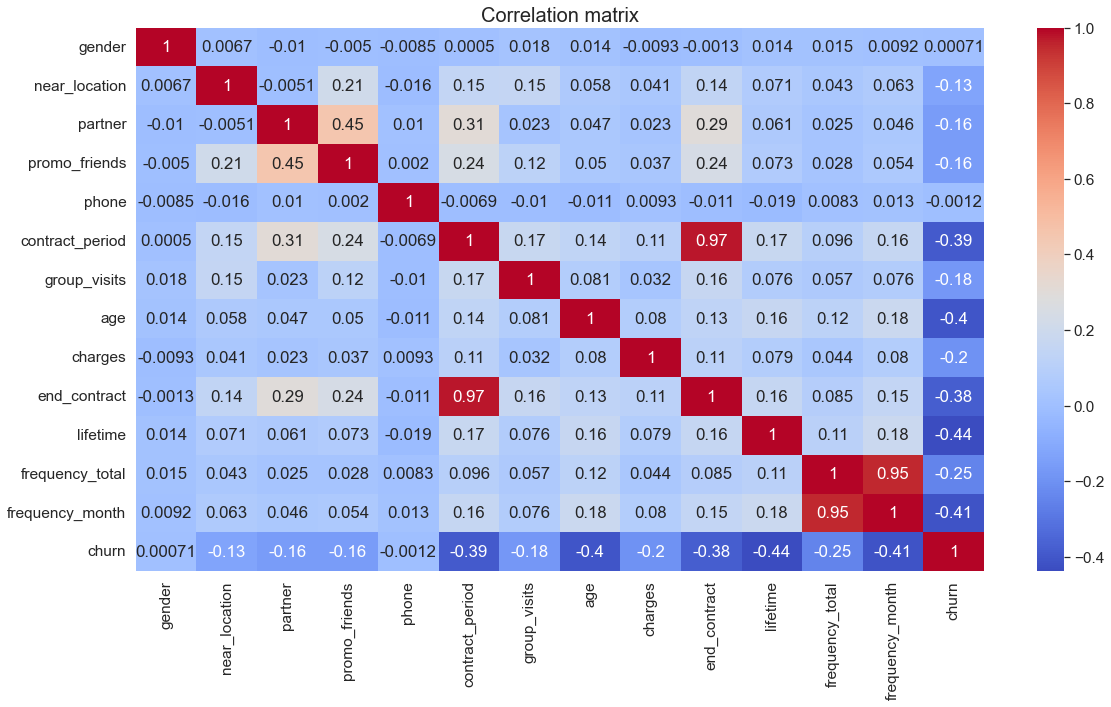

In [15]:
plt.figure(figsize=(19, 10))
sns.set(font_scale=1.4)

corr_matrix = gym.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


plt.title('Correlation matrix', fontsize=20)

plt.show()

From the correlation analysis, we can conclude that gender and having a contact phone do not significantly impact the churn rate, while all other factors have a weak to slightly stronger effect. However, no strongly associated traits were identified in the preliminary analysis.

It is worth noting that there is a strong correlation between the subscription duration and the number of months until the end of the subscription, indicating that the sample likely represents customers who were selected at the beginning of their subscription. Additionally, there is a strong correlation between the average frequency of visits per week since the start of the service and the previous month, suggesting that customers tend to visit the fitness center with similar frequency regardless of service usage.

To prevent these factors from dominating the training of the model, we will exclude end_contract and frequency_total variables from the analysis.





In [16]:
gym = gym.drop(['end_contract', 'frequency_total'], axis=1)

## CONCLUSION
1. Analysis of indicators:

Customer churn. We have data on customers who continue to use the services of the fitness center (loyal customers) and those who "left" (disloyal customers). At the same time in the sample there are more of those who continue to use the services (the average is close to 0.3, and the median is 0).

Client gender. We have data on men and women. There is an equal number of them in the sample (the mean is close to 0.5 and the median value is 1). For outgoing clients and remaining clients, the distributions of this trait are similar.

Proximity to a fitness center. We have data on people who live or work near or far from a fitness center. At the same time, there are more people in the sample who live or work nearby (since the mean is close to 0.85 and the first quartile is 1). And the group that is loyal to the fitness center has slightly more people who live or work nearby than those who are farther away. However, the distributions are not much different for loyal and nonloyal customers.

Partner company employees. Data on people who are or are not employees of the club's partner company are represented in the sample in roughly equal proportions (the average is close to 0.5). There are differences in churn among those who are employees of a club partner company. Among those who stayed, about half are both affiliated and unaffiliated, with a slight preponderance of the former. But of those who left, there are more clients who are not affiliated with an affiliate company. This is also expressed in the distribution of relevant data.

Promotion. We have data on people who purchased or did not purchase their first season ticket under the "Bring a Friend" promotion. In both groups, there are more people who purchased their first season ticket outside of the "Bring a Friend" promotion (because the mean is close to 0.3 and the median is 0). But among those who stayed, there are more people who came for the promo, although the distributions for loyal customers and those who left are close.

Contact phone number. The available customer data either has contact phone number data or does not. At the same time, there are more of those in the sample for whom contact information is provided (since the average is close to 0.9 and the fourth quartile is 1) for both categories: loyal and disloyal customers (distributions are similar).

Customer age. We have data on customers ages 18 to 41 (with no customers in their 40s). The average age is 29. The people of different ages are chosen fairly evenly (because the mean is close to the median, the distribution for loyal and disloyal customers is normal, and the standard deviation is very low). The distribution for loyal customers is slightly skewed to the right, and the distribution for departing customers is skewed to the left. So, in the group of people who are loyal to the fitness center, the average age is about 30 years old, and among those who leave, the average age is about 27 years old. That is, the second group is slightly younger.
Group classes. We have data on clients who attend or do not attend group classes. At the same time, there are slightly more of those who do not attend such classes in the sample (the average is close to 0.4, and the median is 0). At the same time, among the loyal clients, the distribution of those who attend such classes and those who do not is approximately equal (the latter are slightly more numerous); but among those who have gone into exodus, there are significantly more group class non-attendees than group class attendees.

Frequency of attendance over the entire term. We have data on clients with an average frequency of attendance over the entire time since the beginning of the subscription ranging from 0 to 6 times per week. On average, this value is about 2 times per week. The sample is even, because the mean is almost equal to the median and the standard deviation is low. The distribution for the average frequency of visits per week during the subscription period in both groups (loyal and nonloyal customers) is normal. For the loyal group it is slightly skewed to the left, and for the outgoing group there is a strong shift to the left. Loyal clients, on average, visit the center 2 times a week, and those leaving - from 1 to 2.

Frequency of visits per month. We have data on clients with an average frequency of visits per month ranging from 0 to 6 times per week. The average value is about 2 times per week. The distributions and averages are similar to the distributions of the same indicator for the entire term of the subscription.

Revenue from other services. Revenue from other fitness center services per client ranged from 0.15 to 552.6 cents. The average value is about 147 MU, the median value is 136 MU. The variation in the data is very large (we don't know for sure in which denominations the data is measured). The average revenues from other fitness center services between the groups differ by 43 denominations. (it is higher in the loyal group than in the outgoing group). The distribution of average revenue from other fitness center services for both datasets is shifted to the left with a larger shift for those who leave. That is, those who are leaving are trying to minimize spending on additional services at the fitness center.

2. Based on the correlation:
 we see that attributes such as gender and contact phone availability have almost no effect on the final churn rate. All other traits have the opposite effect: weak or slightly stronger. The preliminary analysis did not reveal any clearly influencing attributes that are closely connected with the resulting indicator. We also note that there is a strong correlation between the indicators of subscription duration and the number of months to the end of the subscription. This suggests that the sample represents customers who are selected at a certain stage of subscription purchase. Most likely at the beginning of the subscription. There is also a strong correlation between the average frequency of visits per week since the beginning of the subscription and the previous month. This suggests another relationship: most likely, the clients visit the fitness center approximately the same number of times per week regardless of how much they use the services of the center.

# Step 3: Build a model for predicting user churn

In [17]:

# Let's divide the data into attributes (matrix x) and target variable (y)
x = gym.drop('churn', axis = 1)
y = gym['churn']

# Let's divide the sample into training and validation samples in the ratio of 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

# Standardizing data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_st = scaler.transform(x_train)
x_test_st = scaler.transform(x_test)

## Model training
1. Logistic regression

In [18]:

logreg_model = LogisticRegression(random_state=0)


logreg_model.fit(x_train_st, y_train)


logreg_predictions = logreg_model.predict(x_test_st)
logreg_probabilities = logreg_model.predict_proba(x_test_st)[:,1]

2. Random Forest

In [19]:

randfor_model = RandomForestClassifier(random_state=0)

randfor_model.fit(x_train_st, y_train)

randfor_predictions = randfor_model.predict(x_test_st)
randfor_probabilities = randfor_model.predict_proba(x_test_st)[:,1]

3. Estimating metrics and comparing models

In [20]:
# Define a function that will output our metrics
def print_metrics(y_true, y_pred, y_proba, model_name):
    print("Metrics for the model"+model_name)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [21]:

print_metrics(y_test, logreg_predictions, logreg_probabilities, 'Logistic regression')
print()

print_metrics(y_test, randfor_predictions, randfor_probabilities, 'Random Forest')

Metrics for the modelLogistic regression
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.84
	F1: 0.84
	ROC_AUC: 0.97

Metrics for the modelRandom Forest
	Accuracy: 0.91
	Precision: 0.85
	Recall: 0.77
	F1: 0.81
	ROC_AUC: 0.96


The dataset was split into 80% for training and 20% for validation when creating the model. Two models were then developed and trained using the logistic regression and random forest algorithms. The primary performance metrics of the models are as follows: For the logistic regression model, the accuracy is 0.92, precision is 0.85, recall is 0.84, F1 score is 0.84, and ROC_AUC is 0.97. For the random forest model, the accuracy is 0.91, precision is 0.85, recall is 0.77, F1 score is 0.81, and ROC_AUC is 0.96. In general, both models can make reasonable predictions, but the logistic regression model outperforms the random forest model in all indicators. This includes accuracy, precision, recall, F1 score, and ROC_AUC, which is the most accurate metric for evaluating classifier quality.

#  Step 4. Create user clusters

In [22]:

scaler = StandardScaler()

x_st = scaler.fit_transform(x)

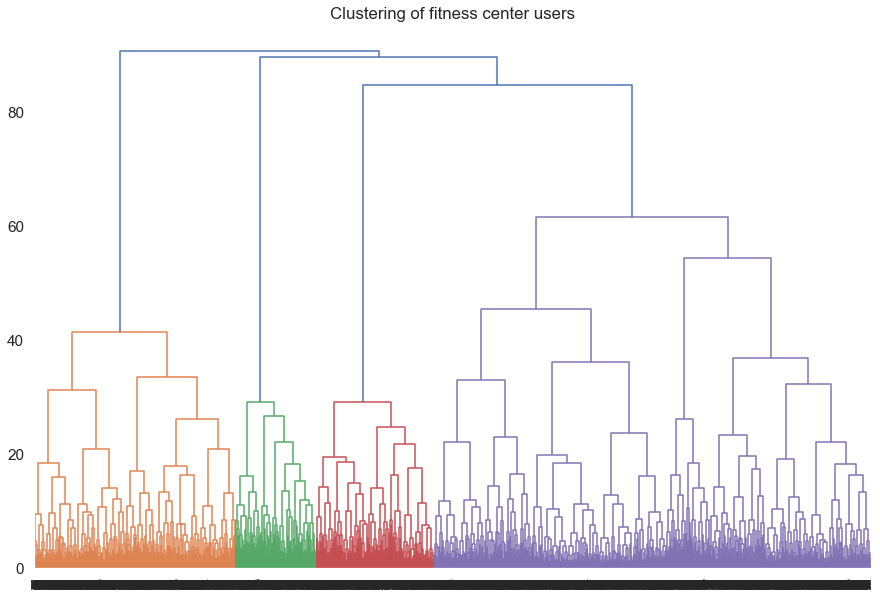

In [23]:
links = linkage(x_st, method = 'ward')
plt.figure(figsize=(15, 10))
plt.title('Clustering of fitness center users')
dendrogram(links, orientation='top')
plt.show()

The dendrogram suggests that there are four clusters in the data. but, the project condition asks for 5 clusters, so we will assume that there are 5 clusters

## Clustering model training and client cluster prediction

In [25]:
# Set the k_means model with the number of clusters 5
km = KMeans(n_clusters = 5, random_state=0)

# Predict clusters for observations
labels = km.fit_predict(x_st)

# Save the cluster labels in the field of our dataset
gym['cluster_km'] = labels

# Change clusters name
gym.loc[gym['cluster_km']==0, 'cluster_km'] = 'cluster_1'
gym.loc[gym['cluster_km']==1, 'cluster_km'] = 'cluster_2'
gym.loc[gym['cluster_km']==2, 'cluster_km'] = 'cluster_3'
gym.loc[gym['cluster_km']==3, 'cluster_km'] = 'cluster_4'
gym.loc[gym['cluster_km']==4, 'cluster_km'] = 'cluster_5'

# Let's derive the average values of the features for the clusters
gym.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,charges,lifetime,frequency_month,churn
cluster_km,,,,,,,,,,,,
cluster_1,0.496447,0.995939,0.892386,1.000000,1.0,6.922843,0.524873,29.606091,153.424651,4.283249,1.919520,0.119797
cluster_2,0.500000,0.000000,0.489247,0.078853,1.0,2.994624,0.232975,28.679211,137.125763,2.974910,1.597146,0.403226
cluster_3,0.500940,1.000000,0.217105,0.072368,1.0,2.010338,0.277256,27.583647,119.339956,1.922932,1.203319,0.563910
cluster_4,0.534260,0.996028,0.379345,0.009930,1.0,6.208540,0.538232,30.699106,176.259567,5.415094,2.324220,0.014896
cluster_5,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.723967,0.266839


In order to investigate how attributes are distributed among the clusters, we created bar charts for categorical variables such as gender, proximity to the fitness center, affiliation with a partner company, first visit through the "Bring a Friend" promotion, availability of contact information, subscription duration, group class attendance, and churn. We also used boxplots to visualize the distribution of continuous variables such as age, time since first contact, average weekly attendance rates per month, and revenue from other fitness center services.

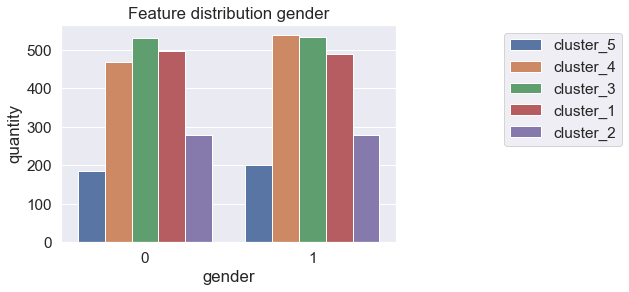

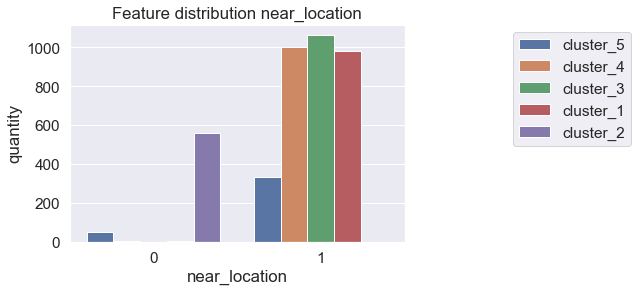

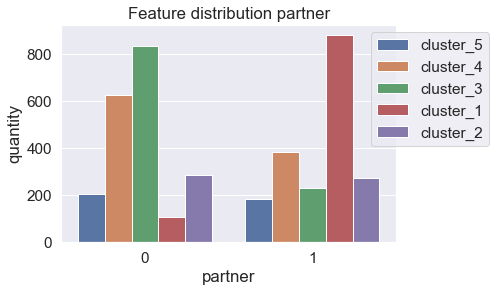

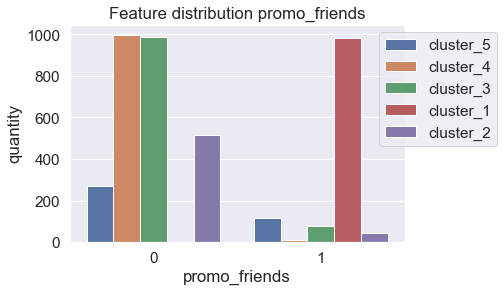

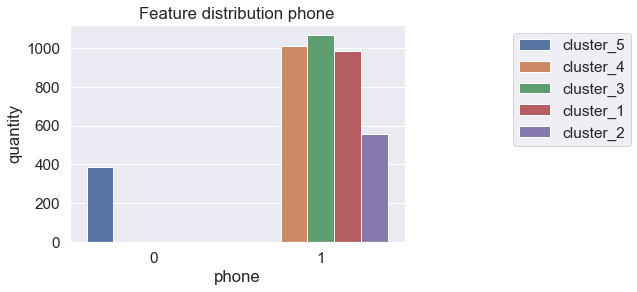

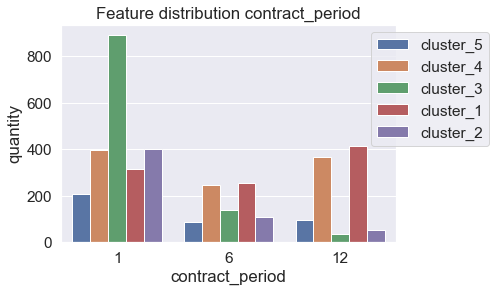

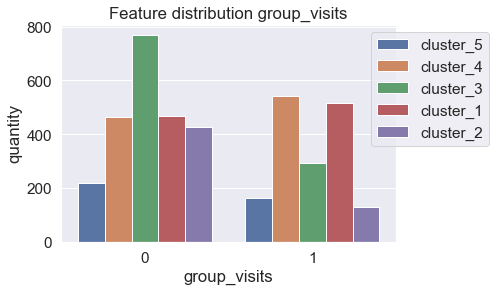

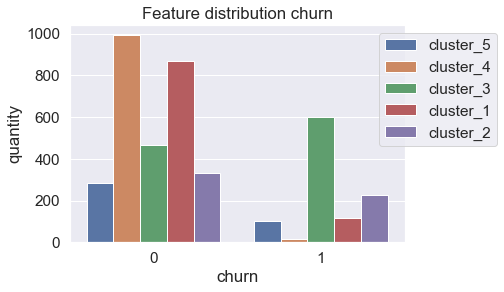

In [27]:
log_discr_values = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'churn']
fig, ax = plt.subplots()
for column in log_discr_values:
    plt.title("Feature distribution "+column)
    sns.countplot(data=gym, x=column, hue='cluster_km')
    plt.xlabel(column)
    plt.ylabel("quantity")
    plt.legend(bbox_to_anchor=(1.3, 1))
    plt.show()

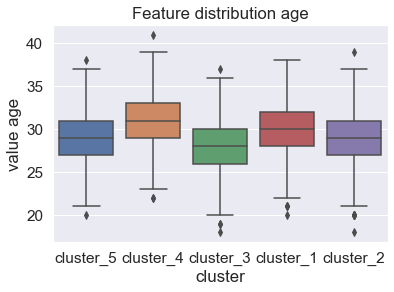

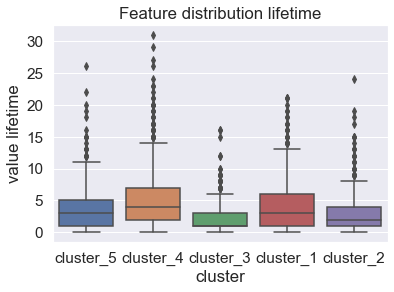

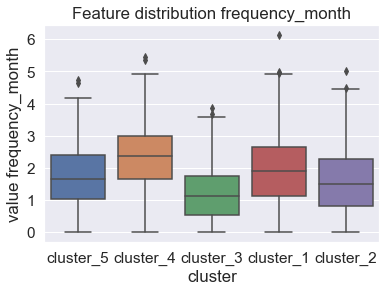

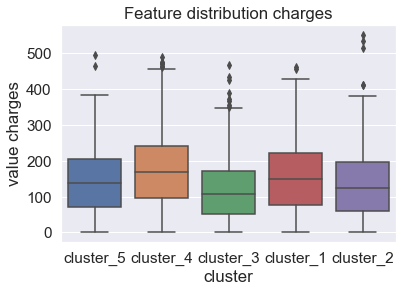

In [30]:
# Let's graph continuous values
cont_values = ['age', 'lifetime', 'frequency_month', 'charges']
fig, ax = plt.subplots()
for column in cont_values:
    plt.title("Feature distribution "+column)
    sns.boxplot(x='cluster_km', y=column, data=gym)
    plt.xlabel('cluster')
    plt.ylabel('value '+column)
    plt.show()

### Cluster 1

* An approximately equal distribution between males and females;
* clients who are in the vicinity of the fitness center;
* clients, most of whom (about 80%) did not come from partner companies;
* clients who did not come by promotions from friends;
* availability of contact information;
* 1, 6 and 12-month subscriptions, with a significant predominance of 1-month subscriptions;
* customers, about 30% of whom attend group classes;
* average age of approximately 27.5 years;
* low level of co-payments;
* a short period of time since the beginning of the service;
* Attendance about once a week.

### Cluster 2 

* an approximately equal distribution between males and females;
* clients who are in the vicinity of the fitness center;
* clients, most of whom (about 90%) came from partner companies;
* clients, most of whom (about 70%) came from non-promotional friends;
* availability of contact information;
* 1-month, 6-month, and 12-month subscriptions with about equal distribution and a slight predominance of 12 months;
* customers, about half of whom attend group classes;
* an average age of about 29.5 years;
* a high level of co-payments;
* average length of time since starting to use the services;
* attendance about twice a week.

### Cluster 3 
* Approximately equal distribution between men and women;
* customers, most of whom are close to the fitness center;
* Approximately equal number of visitors from partner companies and regular visitors;
* customers, most of whom (about 70%) came from outside the promotion from friends;
* lack of contact information;
* 1-month, 6-month, and 12-month subscriptions, with about equal distribution and a slight predominance of 1-month
* clients, about 40% of whom attend group classes;
* an average age of 29-29.5 years;
* an average level of co-payments;
* average length of time from the beginning of service use;
* Attendance about 1.5 to 2 times a week.

### Cluster 4 
* Approximately equal distribution between males and females;
* clients who live or work far away from the fitness center;
* Approximately equal numbers of visitors from partner companies and regular visitors;
* customers, most of whom (about 75%) came from non-promotional friends;
* availability of contact information;
* 1-month, 6-month and 12-month subscriptions, with a predominance of 1 month;
* clients, about 25% of whom attend group classes;
* average age of about 28.5 years;
* an average level of co-payments;
* a short period of time since the beginning of the service;
* Attendance about 1.5 times per week.

### Cluster 5 
* A slightly higher number of people of one gender, compared to the other;
* clients who are close to the fitness center;
* clients, most of whom (about 65%) did not come from partner companies;
* customers who didn't come by promotions from friends;
* availability of contact information;
* 1-month, 6-month, and 12-month subscriptions with about equal distribution and slightly fewer 6-month
* customers, about half of whom attend group classes;
* an average age of about 30.5 years;
* a very high level of co-payments;
* a long period of time from the beginning of service use;
* attendance about 2-2.5 times per week.

## Calculation and analysis of churn rates for clusters

In [31]:
(gym
     .groupby('cluster_km')['churn']
     .mean()
     .reset_index()
     .sort_values(by='churn', ascending=False)
     .reset_index(drop=True))

,cluster_km,churn
0,cluster_3,0.563910
1,cluster_2,0.403226
2,cluster_5,0.266839
3,cluster_1,0.119797
4,cluster_4,0.014896


The first cluster is most prone to churnss: the share is about 55-56%. The fourth cluster is characterized by a churn share of 40%, and the third cluster is about 27%. The second and fifth clusters (churnss of 12% and 2%, respectively) are the most reliable.

# GENERAL CONCLUSION


A study was conducted on the data on the clients of the fitness center . These data contain information about 4 000 clients and 14 indicators, one of which (client churn is selected as a resultant in the model). The following client characteristics were chosen as the analyzed indicators which affect the churn: gender, proximity to the fitness center, belonging to a company-partner of the fitness center, the fact of initial registration in the promotional action "bring a friend", availability of a contact phone, age, time since the first visit to the fitness center, duration of the current subscription, period until the end of the current subscription, the fact of group sessions, the average frequency of visits per week for all time since the beginning of the subscription and for the previous month,

The analysis of the data allowed us to draw the following conclusions.

1. The average for customer churn is close to 0.3, and the median is 0.
   Accordingly, about a third of the fitness center's clients go into churn.

2. The average by gender of the clients is close to 0.5, and the median is equal to 1.
   Accordingly, the services of the fitness center are used equally by men and women.

3. The mean by proximity to the fitness center is close to 0.85, and the first quartile is 1. The distributions by trait are not significantly different. The mean for loyal customers is slightly higher than for people going out.
   Thus, more customers who live nearby visit the fitness center. At the same time, those who live    nearby are slightly more loyal to the fitness center than those who live farther away.

4. The average for affiliation with a partner company is close to 0.5. The distributions for outgoing and remaining customers behave differently.
   Thus, the fitness center has equal representation of clients who are employees of partner companies and people who are not related to them. But the clients who left in the outflow to a greater extent are not the employees of the companies-partners.

5. The average for those who came to the promotion "Bring a friend" equals 0,3, the median equals 0.The distributions for the clients who went to the outflow and the loyal clients are close, but the average values are slightly different (for the second group the value is higher).
   Accordingly, most of the clients of the fitness center didn't come for the promo-campaign "Bring a friend", but among the loyal clients who used the promo-campaign more than among those who went into outflow.
6. The average for the presence of a contact phone is close to 0.9, and the fourth quartile is 1. The distributions for loyal and disloyal clients are similar.
   Thus, almost all fitness center clients leave contacts for contact - regardless of whether they stay at the fitness center or go into outbound.

7. The minimum age value is 18, the maximum is 41, and the average is 29. The mean is close to the median, the standard deviation is very low, and the distribution for loyal and disloyal clients is normal. The distribution for loyal customers is slightly skewed to the right with a mean of 30, and the distribution for departing customers is skewed to the left with a mean of 27.
   Accordingly, fitness center services are used by clients between the ages of 18 and 41 (with an average age of about 29). And the clients of younger age (about 27 years old) go further into the exodus.

8. The minimum value of time from the first treatment is 0, the maximum - 31, the average - 3, the median is close to 4 months. The distribution of time since the first contact for both groups (loyal and disloyal) is similar to the Poisson distribution. But for outgoing clients it is strongly shifted to the left (with an average of 1 month), with almost no value in higher values, and for loyal clients it takes higher values (with an average of 5 months).
   Thus, the fitness center has "new" clients (who have been using the services of the center for several months) and "experienced" clients (who started attending the fitness center long enough). At the same time, the clients who have already shown loyalty to the fitness center in the first few months are not likely to leave in the following months.

9. The index of the subscription duration can take values of 1, 6 and 12 months. The average value is 4-5 months. However, there is a skew in the data: the median is 1 month. The average value for loyal users is 5-6 months, for outgoing users - 1-2 months. The index of time to the end of the subscription takes values from 1 to 12 months. The average value is 4 months, and there is a skew in the data: the median is 1 month. Differences in the distribution of groups (loyal and disloyal customers) by the period until the end of the current subscription are the same as in the distribution by the duration of the subscription.
   Accordingly, customers prefer to buy a short-term subscription, but those who bought a longer-term subscription are more reluctant to go out of business than those who have a short-term subscription.

10. The average attendance of group classes is close to 0.4, and the median is equal to 0. The distributions of loyal and outgoing clients are different.
    Thus, among the clients of the fitness center there are more of those who are not interested in group classes (about 60%). At the same time the clients who are leaving the center are practically not interested in such classes.
11. The average frequency of visits for the whole time since the beginning of the subscription and for the previous month varies between 0 and 6 times a week. The mean and median are almost equal, the standard deviation is low. The distribution for the loyal and disloyal groups is normal. For the loyal group it is slightly shifted to the left (mean 1-2), and for the outgoing group there is a strong shift to the left (mean about 2).
    Accordingly, there are people in the fitness center who have bought a subscription, but have never visited the center, and there are very "committed" clients (visiting 6 times a week). At the same time, on average, all customers visit the center about 1-2 times a week. However, among the loyal customers there are a lot of those who frequently visit the fitness center.

12. Revenue per client from other fitness center services varies greatly from 0.15 to 552.6 denominations. The mean is 147 cfu and the median is 136 cfu. Between the groups (loyal and disloyal customers) the difference in the average value is 43 d. units. (the value is higher for the loyal ones). The distribution of the average revenue from other services of the fitness center for both datasets is shifted to the left with a larger shift for the people who left.
    Thus, spending on other fitness center services varies greatly for clients. At the same time, outgoing clients tend to save money, and among the loyal clients there are those who are willing to pay a very high price.

13. The main metrics of the obtained models, built by the logistic regression algorithm and the random forest algorithm, are as follows. For the logistic regression model: Accuracy = 0.92; Precision = 0.85; Recall = 0.84; F1 = 0.84; ROC_AUC = 0.97. For the random forest model: Accuracy = 0.91; Precision = 0.85; Recall = 0.77; F1 = 0.81; ROC_AUC = 0.96.
    Thus, both the logistic regression model and the random forest model are quite capable of making predictions. However, the model of logistic regression fits better by all indicators: the share of correct answers (accuracy), accuracy (precision), completeness (recall), the aggressive metric F1 and the most accurate metric for assessing the quality of the classifier ROC_AUC.

14. The dendrogram suggested the presence of four clusters in the data. However, it was decided to use five clusters in the K-Means model to predict customer clusters.    

The analysis of the mean values and distributions of attributes for the clusters showed that the selected clusters have the following distinctive characteristics.

* Cluster 1 - are the clients who are close to the fitness center, most of them came not from the companies-partners and not by promotion from friends, with 1, 6 and 12 months membership (with significant prevalence of the former), for one third of which group classes are important, with low level of additional payments, who are our "new" clients, visiting the fitness center about once a week. For them, the churn rate is close to 56% - this is the cluster most prone to churn.

* Cluster 2 - are the clients located near the fitness center, most of whom came from a partner company and non-promotional from friends, with 1, 6 and 12 month subscriptions in roughly equal proportions with a slight predominance of 12 months, about half of whom attend group classes, with a high level of additional payments, who have been our clients for some time, visiting the fitness center about 2 times a week. For them, the churn rate is close to 12% - this is one of the most reliable clusters.

* Cluster 3 are customers, most of whom are close to the fitness center, who came in roughly equal proportions from partner companies and non-partner companies, most of them came from non-promotions from friends, no contact information, with subscriptions for 1, 6 and 12 months (with roughly equal distribution and a slight predominance of 1-month subscriptions), for most of whom (60%) group exercise is not important, with an average level of additional payments, who have been our clients for some time, visiting the fitness center about 1.5-2 times a week. For them, the churn rate is close to 27%.

* Cluster 4 - are customers who live or work far from the fitness center, came in roughly equal proportions from partner companies and not from them, most of them did not come by promotions from friends, with subscriptions for 1, 6 and 12 months (with the prevalence of subscriptions for 1 month), for most of whom group classes are not important, with an average level of additional payments, short period from the start of using services, visiting the fitness center about 1.5 times a week. For them, the churn rate is close to 40% - this is a very high churn-prone cluster.

* Cluster 5 - are customers with a slight preponderance of people of one gender over the other, who live or work near the fitness center, who come mostly not from partner companies or promotions from friends, with subscriptions for 1, 6 and 12 months (with roughly equal distribution of 1 and 12 months, and a little less of 6 months), about half of whom attend group classes, with a very high level of extra fees, who are our regular "long-time" customers, visiting the fitness center about 2-2.5 times a week. For them, the churn rate is close to 2%, which is the most reliable cluster.

# RECOMANDATIONS:
Based on the conclusions presented, the following recommendations are offered for the strategy of interaction with the users of the  fitness center network and their retention.

1. It is recommended to attract clients from nearby bedroom communities to the fitness center.

2. It is recommended to cancel the campaign "Bring your friend" and promotions for employees of partner companies - as they do not contribute to the "retention" of clients and released money to be spent on other activities (for example, distribution of leaflets in the nearby residential areas - point 1).

3. It is possible to implement and advertise subscriptions for a longer period (9 and 12 months) - because the longer the time until the end of the subscription, the more loyal customers.

4. Since the category with long-term subscriptions tends to use additional services, for them it is possible to introduce special discounts and promotions on additional services.

5. It is recommended to set more favorable prices for long-term subscriptions. For example, the price of season tickets for 3 months (you need to implement subscriptions for 3 months) not a little more expensive than a subscription for 1 month (so the customer tends to buy 3 months) - this will reduce the risk of customer outflow in the first months.

6. It is possible to introduce a more favorable subscription renewal for customers who buy subscriptions for 3 months and more. For example, at the end of subscription to buy a new subscription with the same term - a discount of 25%. Such discounts will pay off for the additional services used by loyal customers and the cancellation of ineffective promotions.

7. It is recommended to monitor the average frequency of visits to the fitness center per week by clients. If you find a decrease in the indicator to offer customers "bonuses" (free one-time additional service, discounts on renewal, one free group exercise in a new direction for him, etc.).